In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import os, sys
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


import pandas as pd
from src.dbdata_loader import load_data
import src.data_cleaner as cleaner
import src.plotting as plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load data using the function from the module
df = load_data(credentials_file='../env_vars.txt')

# Now, you can use the DataFrame 'df' in your notebook
df.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
new_df=df.copy()

In [6]:
new_df.info()
new_df['Start'] = pd.to_datetime(new_df['Start'])
new_df['End'] = pd.to_datetime(new_df['End'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [7]:
# the top 10 handsets used by the customers

top_handsets = new_df['Handset Type'].value_counts().head(10)
print(f'the top 10 handset used by customers \n {top_handsets}')

the top 10 handset used by customers 
 Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [10]:
#the top 3 handset manufacturers

top_manufacturers = new_df['Handset Manufacturer'].value_counts().head(3)
print(f'the top 3 handset manufacturers \n {top_manufacturers}')

the top 3 handset manufacturers 
 Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [11]:
#the top 5 handsets per top 3 handset manufacturer
for manufacturer in top_manufacturers.index[:3]:
    top_handsets_per_manufacturer = new_df[new_df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

print(f'the top 5 handsets per top 3 handset manufacturer \n {top_handsets_per_manufacturer}')

the top 5 handsets per top 3 handset manufacturer 
 Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [12]:
# percentage of missing values in the data
cleaner.percent_missing(new_df)

The dataset contains 12.5 % missing values.


In [10]:
cleaner.missing_values_table(new_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


In [13]:
cleaner.missing_values_table(new_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


In [14]:
new_df["Avg Bearer TP UL (kbps)"].describe()

count    150000.000000
mean       1770.428647
std        4625.355500
min           0.000000
25%          47.000000
50%          63.000000
75%        1120.000000
max       58613.000000
Name: Avg Bearer TP UL (kbps), dtype: float64

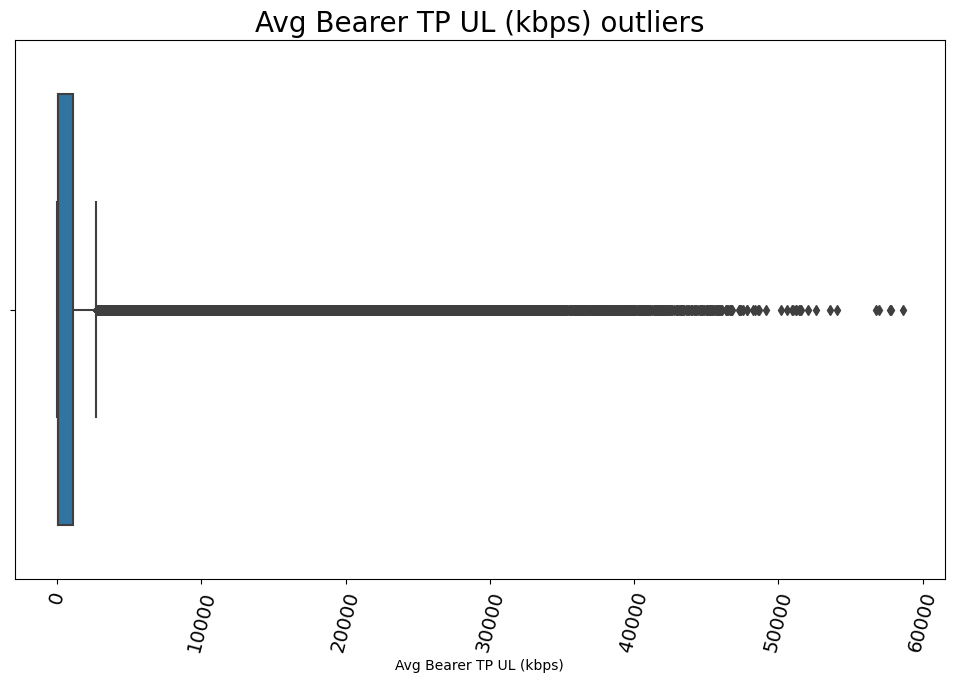

In [15]:
plotting.plot_box(new_df,"Avg Bearer TP UL (kbps)","Avg Bearer TP UL (kbps) outliers")

In [17]:
# outlier needs to be fixed huge gap

# gets the numeric columns to process for outlier fixing.it uses median 

numeric_columns = cleaner.get_numeric_columns(new_df)

# excludes Bearer Id,IMSI, MSISDN/Number, IMEI, Start ms, End ms, Dur. (ms), Dur. (s)
new_df = cleaner.fix_outliers(new_df,numeric_columns,percentile=90) 

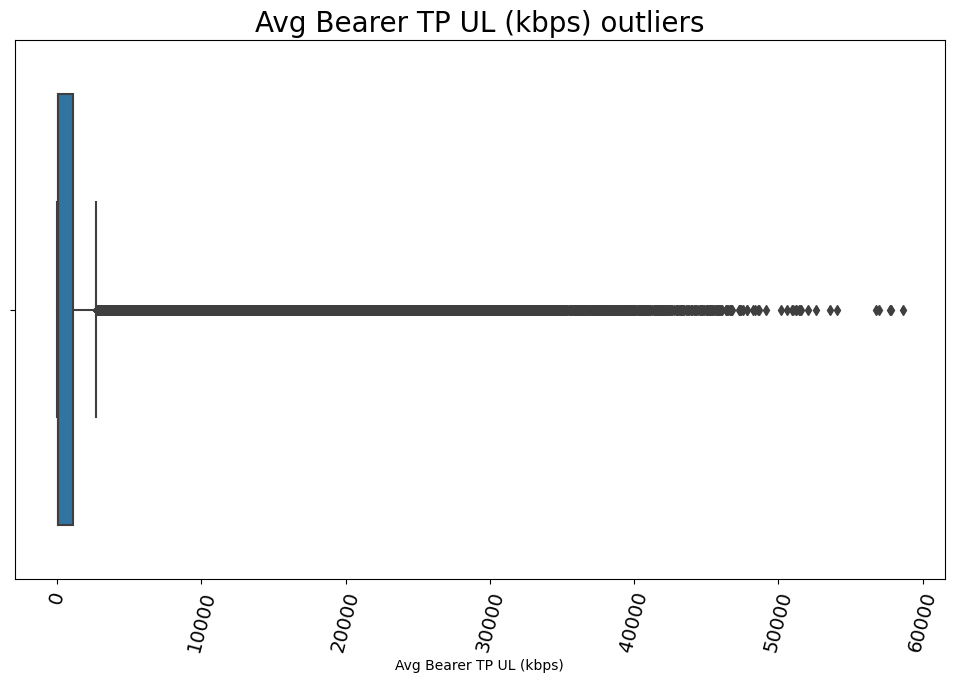

In [16]:
plotting.plot_box(new_df,"Avg Bearer TP UL (kbps)","Avg Bearer TP UL (kbps) outliers")

In [20]:
cleaner.missing_values_table(new_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


130254

Aggregate per user the following information in the column  
    *number of xDR sessions
    *Session duration
    *the total download (DL) and upload (UL) data
    *the total data volume (in Bytes) during this session for each application


In [20]:
new_df['Start'] = pd.to_datetime(new_df['Start'])
new_df['End'] = pd.to_datetime(new_df['End'])
# If the columns have spaces, replace them with underscores for easier access
new_df.columns = new_df.columns.str.replace(' ', '_')

# List of application columns
app_columns = [
    'Social_Media_DL_(Bytes)', 'Social_Media_UL_(Bytes)',
    'Google_DL_(Bytes)', 'Google_UL_(Bytes)',
    'Email_DL_(Bytes)', 'Email_UL_(Bytes)',
    'YouTube_DL_(Bytes)', 'YouTube_UL_(Bytes)',
    'Netflix_DL_(Bytes)', 'Netflix_UL_(Bytes)',
    'Gaming_DL_(Bytes)', 'Gaming_UL_(Bytes)',
    'Other_DL_(Bytes)', 'Other_UL_(Bytes)'
]

# Filter columns that exist in the DataFrame
existing_columns = [col for col in app_columns if col in new_df.columns]

# Group by 'MSISDN/Number' and aggregate the required information
user_aggregation = new_df.groupby('MSISDN/Number').agg(
    Num_of_xDR_sessions=('Bearer_Id', 'count'),  # Number of xDR sessions
    Session_duration=('Dur._(ms)', 'sum'),  # Session duration
    Total_DL=('Total_DL_(Bytes)', 'sum'),  # Total download data
    Total_UL=('Total_UL_(Bytes)', 'sum'),  # Total upload data
    **{f'{col}_DL': (col, 'sum') for col in existing_columns},  # DL data for each application
    **{f'{col}_UL': (col, 'sum') for col in existing_columns}  # UL data for each application
).reset_index()

# Add a column for the total data volume (DL + UL) for each application
user_aggregation['Total_Data_Volume'] = user_aggregation[
    [f'{col}_DL' for col in existing_columns] + [f'{col}_UL' for col in existing_columns]
].sum(axis=1)

print(user_aggregation)

        MSISDN/Number  Num_of_xDR_sessions  Session_duration      Total_DL  \
0        3.360100e+10                    1          116720.0  4.546434e+08   
1        3.360100e+10                    1          181230.0  1.207552e+08   
2        3.360100e+10                    1          134969.0  5.566597e+08   
3        3.360101e+10                    1           49878.0  4.019932e+08   
4        3.360101e+10                    2           37104.0  9.816500e+08   
...               ...                  ...               ...           ...   
106851   3.379000e+10                    1            8810.0  6.879252e+08   
106852   3.379000e+10                    1          140988.0  4.445751e+08   
106853   3.197021e+12                    1          877385.0  1.948281e+08   
106854   3.370000e+14                    1          253030.0  5.396350e+08   
106855   8.823971e+14                    1          869844.0  7.869760e+07   

            Total_UL  Social_Media_DL_(Bytes)_DL  Social_Media_

In [25]:
# Basic metrics 
new_df.describe()

,Bearer_Id,Start,Start_ms,End,End_ms,Dur._(ms),IMSI,MSISDN/Number,IMEI,Avg_RTT_DL_(ms),...,Youtube_DL_(Bytes),Youtube_UL_(Bytes),Netflix_DL_(Bytes),Netflix_UL_(Bytes),Gaming_DL_(Bytes),Gaming_UL_(Bytes),Other_DL_(Bytes),Other_UL_(Bytes),Total_UL_(Bytes),Total_DL_(Bytes)
count,1.490100e+05,150000,150000.000000,150000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,2019-04-26 12:36:09.616800256,499.188200,2019-04-27 17:39:38.703200256,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,46.130583,...,9.639434e+06,9.124236e+06,9.630568e+06,9.112604e+06,3.495975e+08,6.867835e+06,3.487602e+08,6.845370e+06,3.769801e+07,3.821255e+08
min,6.917538e+18,2019-04-04 12:01:00,0.000000,2019-04-24 22:59:00,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,2019-04-25 00:26:00,250.000000,2019-04-26 07:30:00,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,2019-04-26 08:51:00,499.000000,2019-04-27 23:02:00,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,...,1.056132e+07,9.994265e+06,1.055309e+07,9.984265e+06,3.830903e+08,7.524216e+06,3.821312e+08,7.499777e+06,3.910785e+07,4.156148e+08
75%,1.304243e+19,2019-04-27 18:18:15,749.000000,2019-04-29 07:15:00,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,57.000000,...,1.280045e+07,1.211135e+07,1.280945e+07,1.212495e+07,4.653802e+08,9.121792e+06,4.626345e+08,9.090634e+06,4.262563e+07,4.975972e+08
max,1.318654e+19,2019-04-29 07:28:00,999.000000,2019-04-30 23:59:00,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,100.000000,...,1.862167e+07,1.759733e+07,1.863156e+07,1.760126e+07,6.759162e+08,1.326517e+07,6.739843e+08,1.321484e+07,5.094800e+07,7.083961e+08
std,2.893173e+18,NaN,288.611834,NaN,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,17.806439,...,4.851124e+06,4.588855e+06,4.867860e+06,4.599394e+06,1.765279e+08,3.459792e+06,1.756870e+08,3.442831e+06,7.828118e+06,1.765944e+08


In [24]:
# univarate analysis for the necessary columns 
numeric_columns = cleaner.get_numeric_columns(new_df)
excluded_columns = ["Bearer Id", "IMSI", "MSISDN/Number", "IMEI", "Start ms", "End ms", "Dur. (ms)", "Dur. (s)"]
analysis_results = cleaner.univariate_analysis(new_df, numeric_columns, excluded_columns)
analysis_results.shape
print(analysis_results)


                                      Column         Range      Variance  \
0                            Avg RTT DL (ms)  1.450000e+02  9.100443e+02   
1                            Avg RTT UL (ms)  3.300000e+01  6.463913e+01   
2                    Avg Bearer TP DL (kbps)  4.636100e+04  1.392981e+08   
3                    Avg Bearer TP UL (kbps)  4.642000e+03  8.926783e+05   
4                TCP DL Retrans. Vol (Bytes)  2.080991e+07  4.115452e+13   
5                TCP UL Retrans. Vol (Bytes)  7.596577e+05  4.969671e+10   
6                        DL TP < 50 Kbps (%)  1.000000e+02  1.699903e+02   
7             50 Kbps < DL TP < 250 Kbps (%)  1.100000e+01  7.445241e+00   
8              250 Kbps < DL TP < 1 Mbps (%)  6.000000e+00  2.015434e+00   
9                         DL TP > 1 Mbps (%)  5.000000e+00  1.152648e+00   
10                       UL TP < 10 Kbps (%)  1.000000e+02  2.147660e+01   
11             10 Kbps < UL TP < 50 Kbps (%)  2.000000e+00  2.663319e-01   
12          